<a href="https://colab.research.google.com/github/k23mhadh/DIABETES_ML_PROJECT/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT AND DATASET DESCRIPTION :**

The aim of this project is to develop a predictive model to identify the likelihood of diabetes based on various health indicators. Using the Diabetes Health Indicators Dataset, we will explore the relationships between demographic factors, lifestyle choices, and health conditions to understand their impact on diabetes risk. By building and evaluating classification models, our goal is to accurately categorize individuals into two groups: no diabetes and diabetes. This analysis will also aim to provide insights into the most significant predictors of diabetes, which could potentially inform preventive health strategies and personalized recommendations for at-risk individuals.

Dataset URL :https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


**PROJECT INITIALIZATION**

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import os
import urllib.request
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "diabetes_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

DOWNLOAD THE DATASET

In [3]:

DOWNLOAD_ROOT = "https://www.kaggle.com/api/v1/datasets/download/alexteboul/diabetes-health-indicators-dataset"
DATA_PATH = os.path.join("datasets", "diabetes")
DATA_URL = DOWNLOAD_ROOT

def fetch_diabetes_data(data_url=DATA_URL, data_path=DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, "diabetes.zip")
    urllib.request.urlretrieve(data_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)
    os.remove(zip_path)

fetch_diabetes_data()


LOAD THE DATASET

In [4]:

# function to load the dataset
def load_diabetes_data(diabetes_path=DATA_PATH):
    csv_path = os.path.join(diabetes_path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
    return pd.read_csv(csv_path)

In [5]:
diabetes = load_diabetes_data()
#Printing the head of dataset
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
# Display general information about the 'diabetes' DataFrame
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
#Generate descriptive statistics for the numerical columns in the 'diabetes' DataFrame
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


DATASET EXPLORATORY ANALYSIS

In [8]:
# Metadata
print("Number of instances:", diabetes.shape[0])
print("Number of features:", diabetes.shape[1] -1)
print("Feature types:\n", diabetes.dtypes)

Number of instances: 70692
Number of features: 21
Feature types:
 Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [9]:
# Comments:
# The dataset contains a substantial number of instances, suitable for building a classification model.
# The features are primarily numerical, with a mix of integers and floats.
# The signification of each feature is indicated on dataset website

In [10]:
# Null/NA values
print("Number of nulls per feature:\n", diabetes.isnull().sum())

Number of nulls per feature:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [11]:
# Interpretation:
# The dataset appears to have no missing values. This is good as it reduces the need for imputation strategies.

Saving figure attribute_histogram_plots


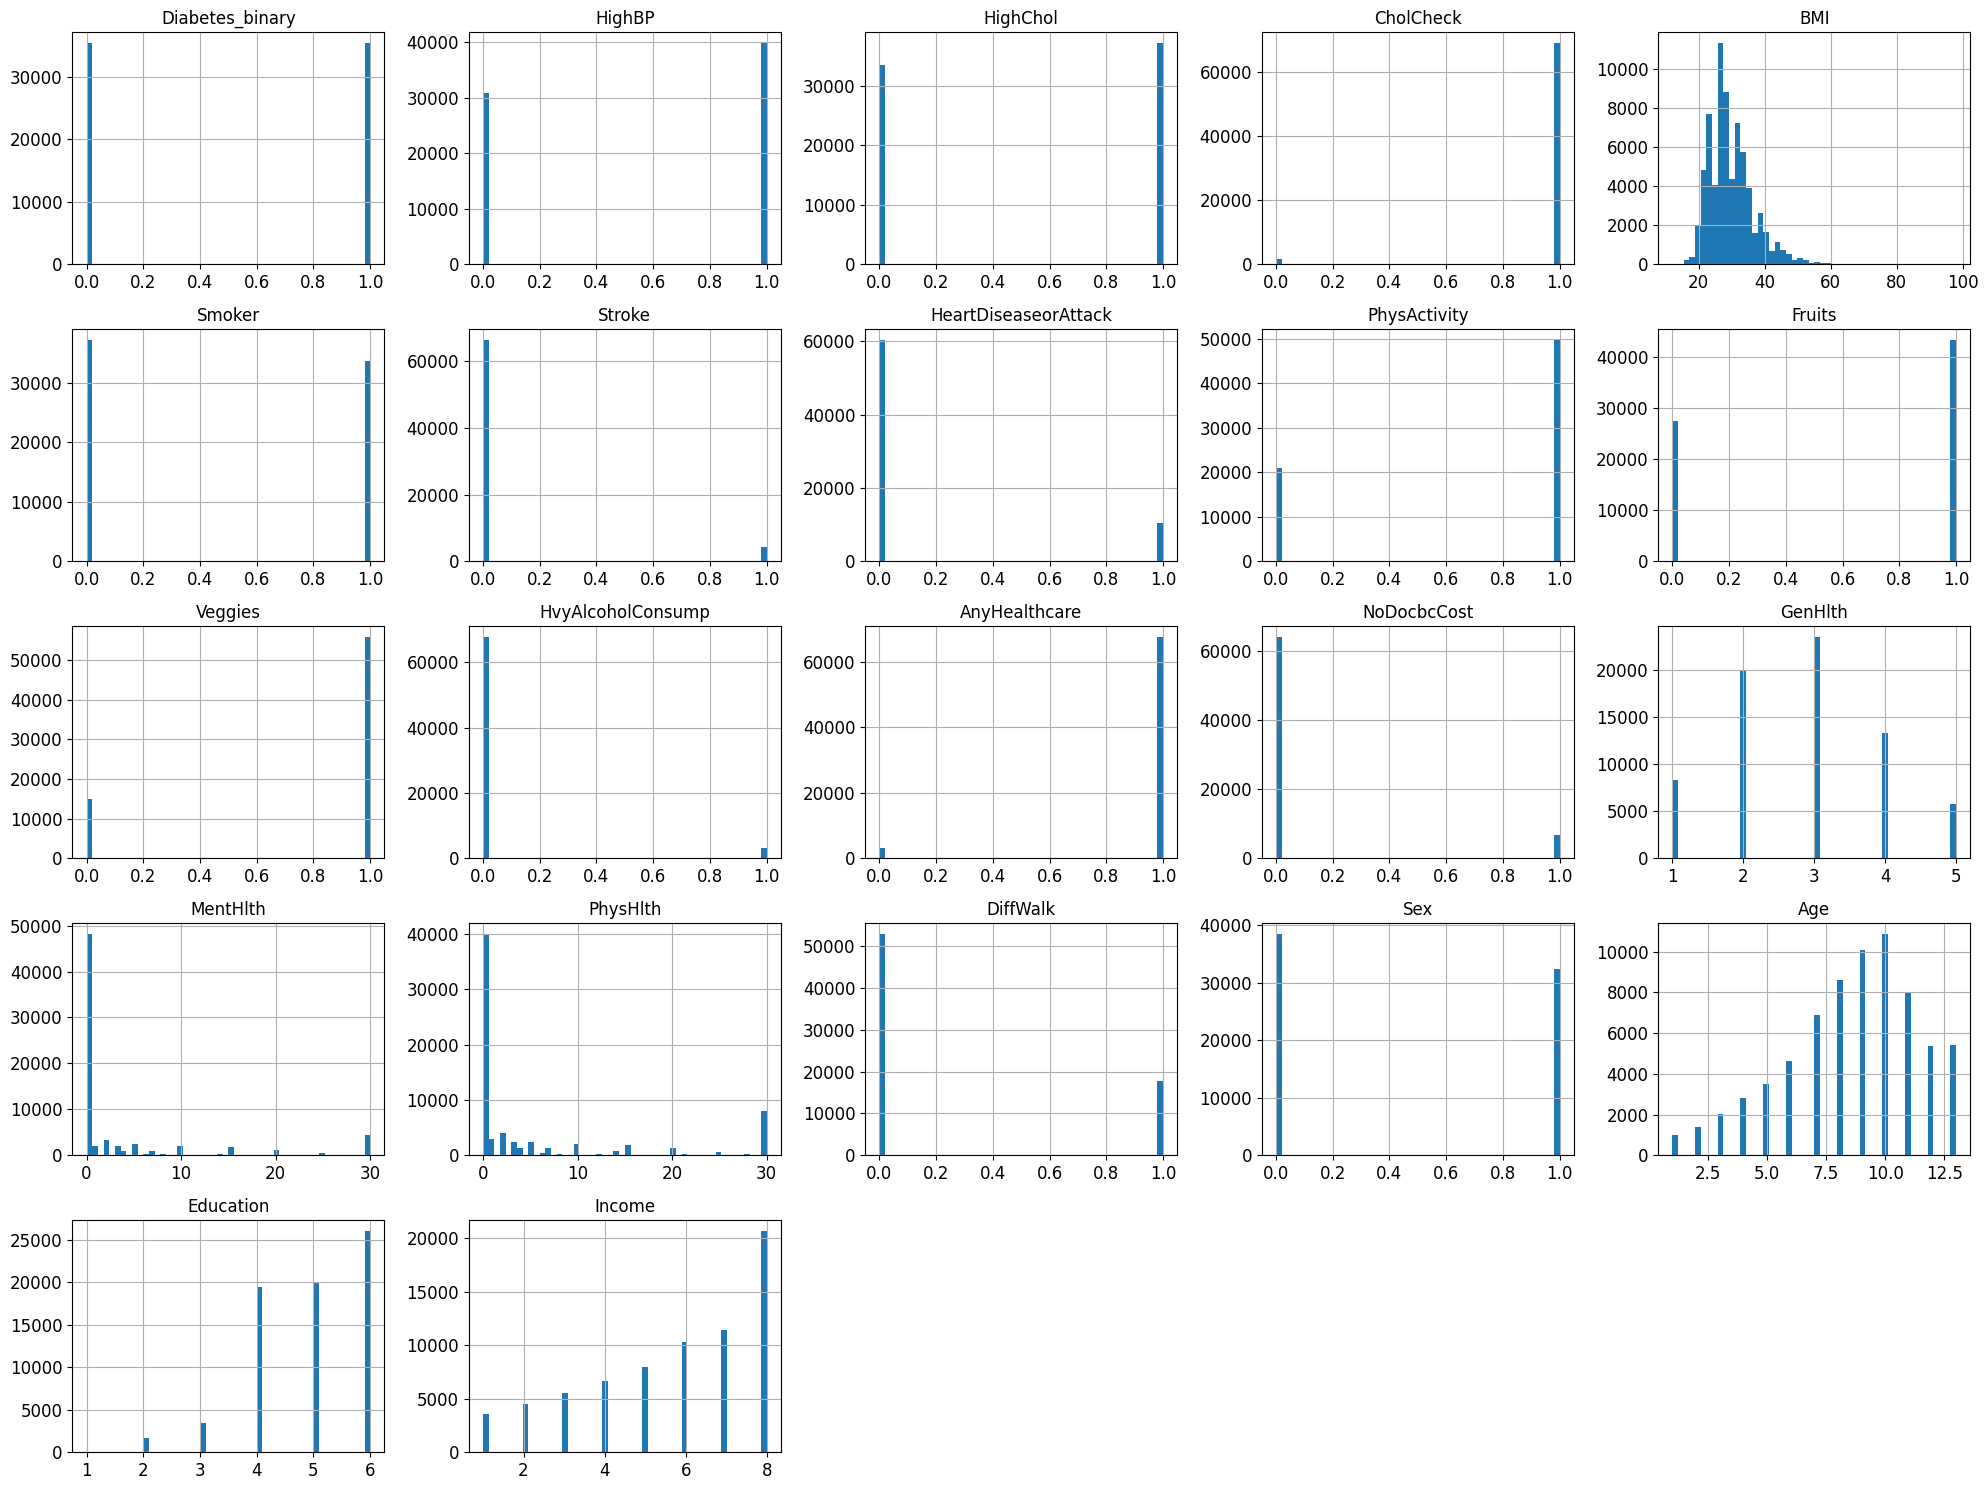

In [12]:
# Feature value distributions
%matplotlib inline
diabetes.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()


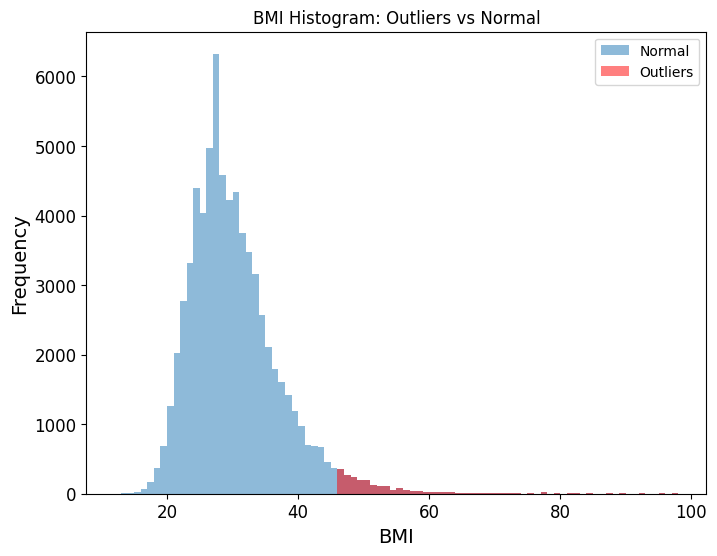

In [13]:
#Outliers identification (BMI)

Q1 = diabetes['BMI'].quantile(0.25)
Q3 = diabetes['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = diabetes[(diabetes['BMI'] < lower_bound) | (diabetes['BMI'] > upper_bound)]

bins = range(int(diabetes['BMI'].min()), int(diabetes['BMI'].max()) + 1, 1)

plt.figure(figsize=(8, 6))

#Histogram plot
plt.hist(diabetes['BMI'], bins=bins, alpha=0.5, label='Normal')
plt.hist(outliers['BMI'], bins=bins, alpha=0.5, label='Outliers', color='r')
plt.legend()
plt.title('BMI Histogram: Outliers vs Normal')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


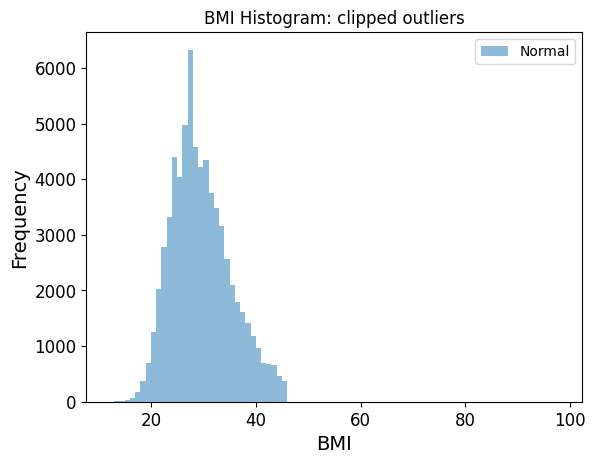

In [14]:
#handle outliers
diabetes = diabetes[(diabetes['BMI'] >= lower_bound) & (diabetes['BMI'] <= upper_bound)]


plt.hist(diabetes['BMI'], bins=bins, alpha=0.5, label='Normal')
plt.legend()
plt.title('BMI Histogram: clipped outliers')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


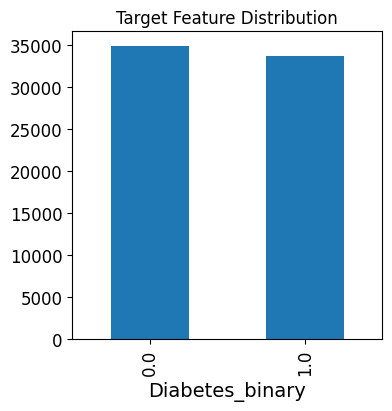

In [15]:
# Target feature study
target_feature = 'Diabetes_binary'
diabetes[target_feature].value_counts().plot(kind='bar', title='Target Feature Distribution', figsize=(4, 4))
plt.show()

In [16]:
# Interpretation and Decision:
# The target class is balanced , This is ideal because it ensures that the model will not be biased toward the majority class (in case of inbalanced).

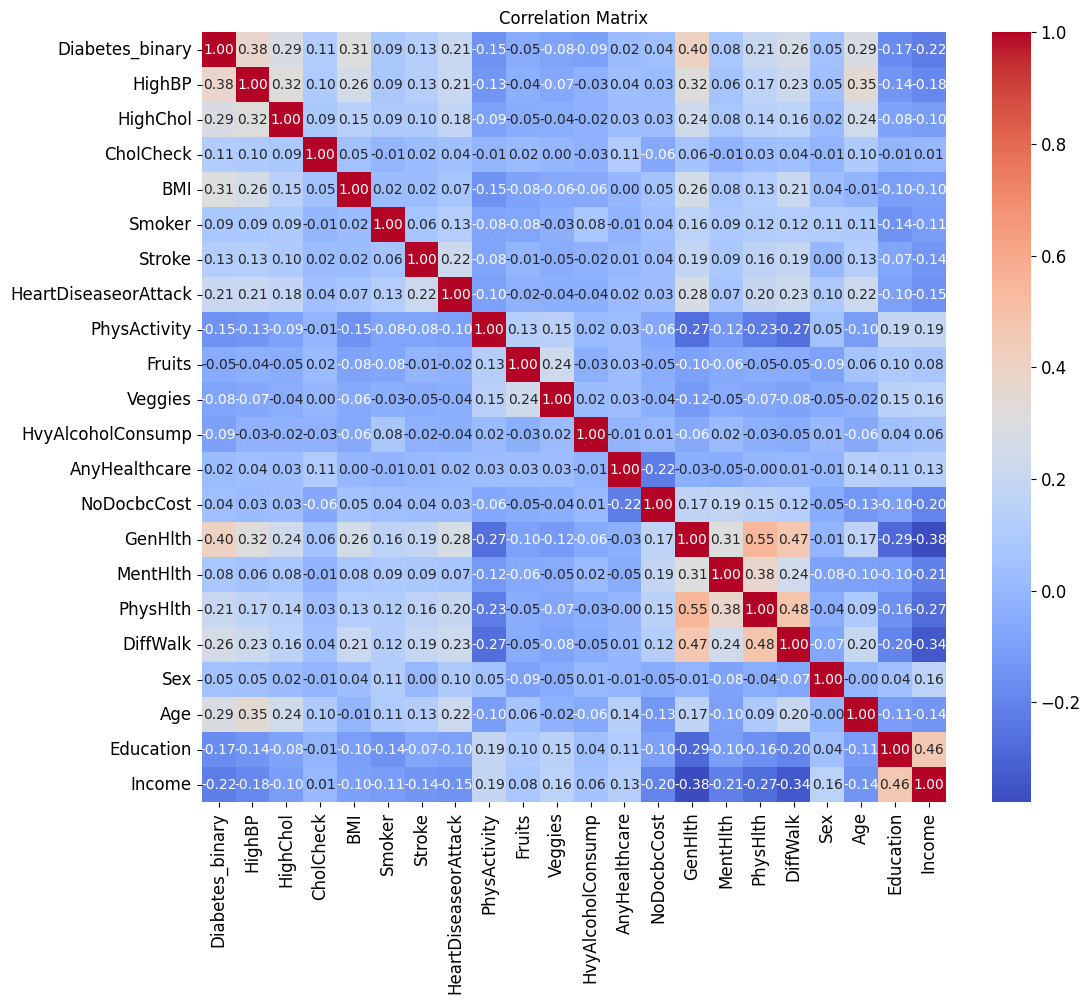

In [17]:
# Feature correlation
correlation_matrix = diabetes.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
#Interpretation:
#GenHlth (General Health) has strong positive correlations with PhysHlth (Physical Health), MentHlth (Mental Health), and DiffWalk (Difficulty Walking).
#This indicates that people with better general health tend to have better physical and mental health and are less likely to have difficulty walking.

#PhysHlth and MentHlth also have a strong positive correlation, suggesting that physical and mental health are closely linked.

#Age has moderate positive correlations with HighBP (High Blood Pressure), HighChol (High Cholesterol), HeartDiseaseorAttack, and DiffWalk.
#This indicates that as age increases, the likelihood of having these health conditions also increases.

#Education has moderate positive correlations with Income
#This suggests that higher education levels are associated with higher income.

#Diabetes_binary (Target) has moderate positive correlations with HighBP, HighChol, and HeartDiseaseorAttack,
#indicating that diabetes is often associated with these conditions.



In [19]:
# Decision on feature reduction:
# Since GenHlth is significantly correlated with PhysHlth, we can remove one of them (let's say PhysHlth).
# We can also see that the Fruits and Veggies features have a very low correlation with all other features, suggesting they are irrelevant.
# Therefore, we can remove them as well.


In [20]:
# Removing irrelevant features
columns_to_drop = ['Fruits', 'Veggies', 'PhysHlth']
diabetes = diabetes.drop(columns=[col for col in columns_to_drop if col in diabetes.columns])

diabetes.duplicated().sum()
diabetes.drop_duplicates(inplace = True)
diabetes.duplicated().sum()


#transfrom binary int64 to int
bin_features = ['Diabetes_binary' ,	'HighBP' 	,'HighChol' 	,'CholCheck' ,	'Smoker' ,	'Stroke' 	,'HeartDiseaseorAttack' ,	'PhysActivity', 	'HvyAlcoholConsump' ,	'AnyHealthcare' 	,'NoDocbcCost' 	,'DiffWalk' ,	'Sex']
diabetes[bin_features] = diabetes[bin_features].astype(int)
diabetes.head()
print(diabetes.columns)




Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


MODEL

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
data_scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

x = diabetes.drop(['Diabetes_binary'], axis = 1)
y = diabetes['Diabetes_binary']

# Fit and transform the numerical features
x = data_scaling_pipeline.fit_transform(x)

#split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((51656, 18), (51656,), (12915, 18), (12915,))

In [1]:
# Evaluate models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

def evaluate_model(y_test, y_pred, model_name, model):
    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot Confusion Matrix
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='d')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve and AUC (if applicable)
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        try:
            y_pred_prob = model.predict_proba(x_test)[:, 1]  # For binary classification
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            auc = roc_auc_score(y_test, y_pred_prob)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.title(f'{model_name} ROC Curve')
            plt.show()
        except Exception as e:
            print(f"Error generating ROC Curve: {e}")
    else:
        print(f"{model_name} does not support probability predictions. Skipping ROC curve.")

Convergence time: 0.0760 seconds
Logistic regression Accuracy: 0.7435
Logistic regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      6340
           1       0.74      0.77      0.75      6575

    accuracy                           0.74     12915
   macro avg       0.74      0.74      0.74     12915
weighted avg       0.74      0.74      0.74     12915



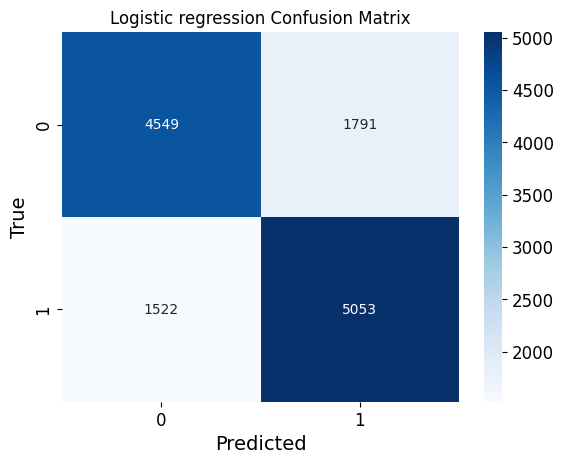

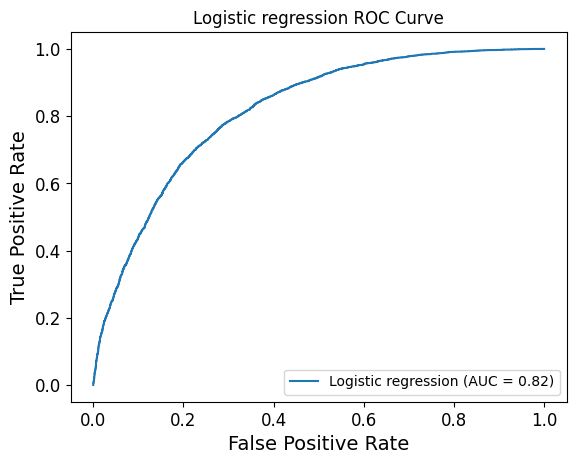

In [23]:
import time
# Step 1: Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

#Converge time
start_time = time.time()
# Step 2: Train the model on the training data
log_reg.fit(x_train, y_train)

end_time = time.time()
convergence_time = end_time - start_time

print(f"Convergence time: {convergence_time:.4f} seconds")

# Step 3: Make predictions on the test set
y_pred = log_reg.predict(x_test)

# Step 4: Evaluate the model
evaluate_model(y_test,y_pred, "Logistic regression" ,log_reg)

Random Forest Accuracy: 0.7075
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      6340
           1       0.70      0.75      0.72      6575

    accuracy                           0.71     12915
   macro avg       0.71      0.71      0.71     12915
weighted avg       0.71      0.71      0.71     12915



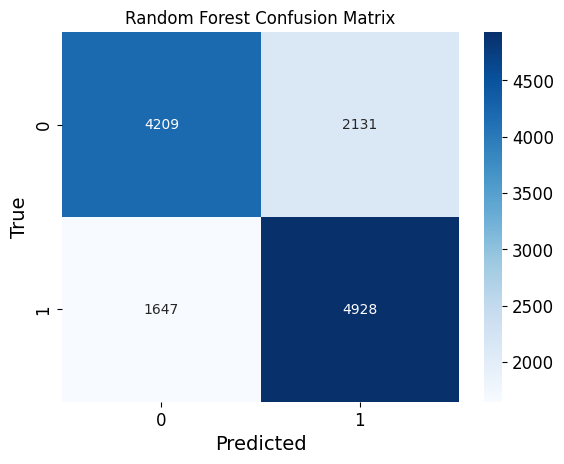

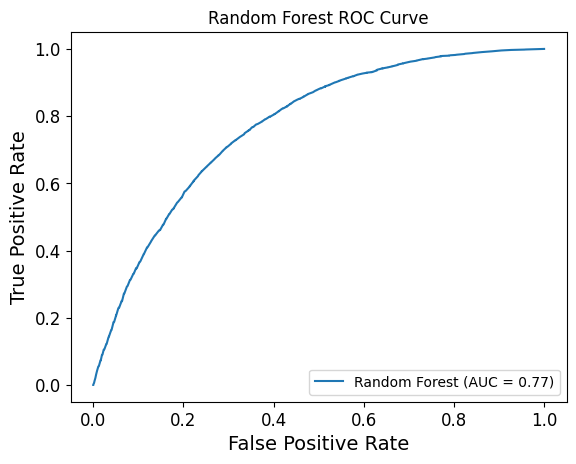

In [24]:
#Random forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
evaluate_model(y_test,rf_pred, "Random Forest",rf)



KNN Accuracy: 0.7034
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      6340
           1       0.70      0.73      0.72      6575

    accuracy                           0.70     12915
   macro avg       0.70      0.70      0.70     12915
weighted avg       0.70      0.70      0.70     12915



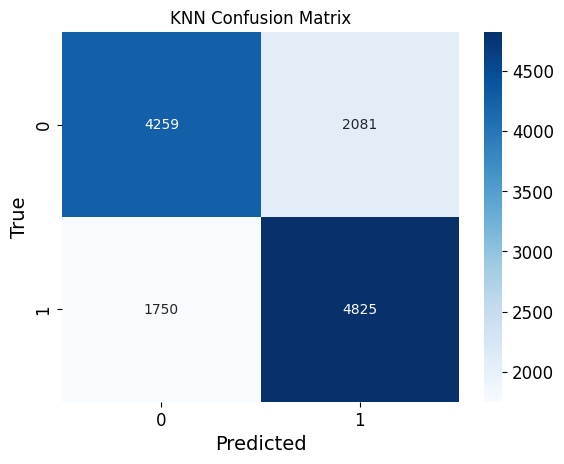

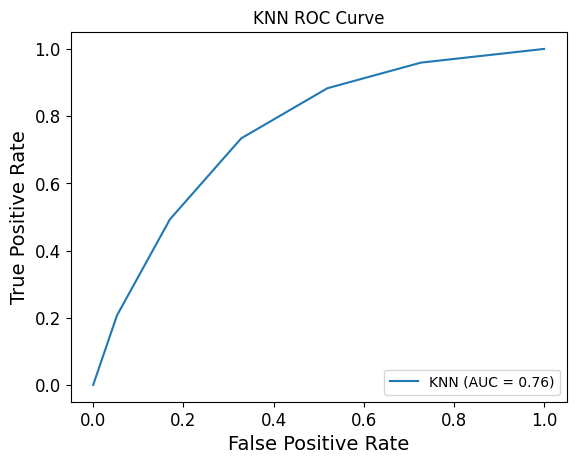

In [25]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
evaluate_model(y_test,knn_pred, "KNN",knn)

Stacking Accuracy: 0.7120
Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.70      6340
           1       0.70      0.75      0.73      6575

    accuracy                           0.71     12915
   macro avg       0.71      0.71      0.71     12915
weighted avg       0.71      0.71      0.71     12915



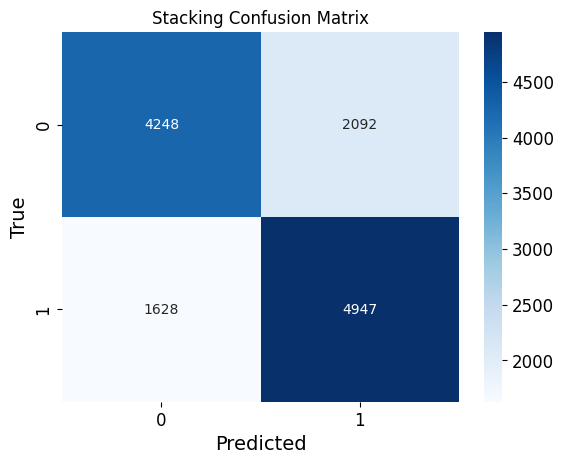

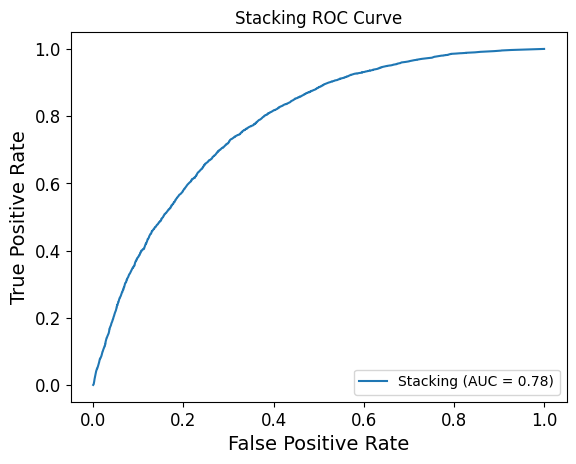

In [26]:
#Ensemble method

# Base models
estimators = [
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Stacking
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(x_train, y_train)
y_pred_stack = stack.predict(x_test)
evaluate_model(y_test, y_pred_stack, "Stacking",stack)


In [27]:
# Based on the accuracy results, we can interpret that the logistic regression model performed very well compared to other models.
# However, the ensemble method did not perform as well as expected.
# Next, we will try to enhance the model based on hyperparameters


Enhanced Models, Hyperparameter Tuning & Analysis

Convergence time: 10.1013 seconds
Enhanced Logistic Regression Accuracy: 0.7436
Enhanced Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      6340
           1       0.74      0.77      0.75      6575

    accuracy                           0.74     12915
   macro avg       0.74      0.74      0.74     12915
weighted avg       0.74      0.74      0.74     12915



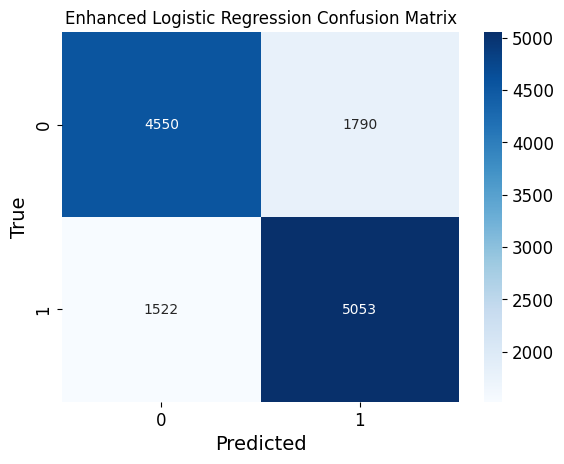

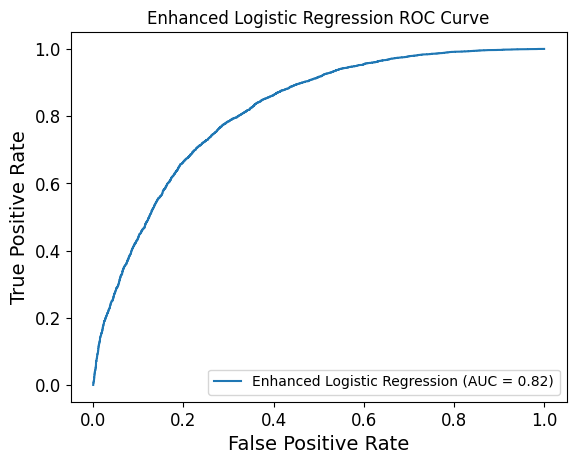

In [28]:

# Create a pipeline with StandardScaler and LogisticRegressionCV
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegressionCV(cv=5, penalty='l2', solver='sag'))
])

#Conv Time
start_time = time.time()
# Step 2: Train the model on the training data
log_reg_pipeline.fit(x_train, y_train)

end_time = time.time()
convergence_time = end_time - start_time
print(f"Convergence time: {convergence_time:.4f} seconds")


# Train the model

# Make predictions
y_pred_log_reg = log_reg_pipeline.predict(x_test)

# Evaluate the model
evaluate_model(y_test, y_pred_log_reg, "Enhanced Logistic Regression",log_reg_pipeline)


In [29]:
#After applying the regularization technique, we observed that the model's accuracy slightly improved.
#However, the convergence time increased. Therefore, we decided to retain the first model with a shorter convergence time and similar performance.
